In [63]:
!pip install tensorflow

In [64]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [65]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [66]:
X_test.shape

(10000, 32, 32, 3)

In [67]:
y_train.shape

(50000, 1)

In [68]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [69]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [70]:
y_test = y_test.reshape(-1,)

In [71]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [72]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

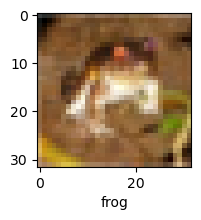

In [73]:
plot_sample(X_train, y_train, 0)

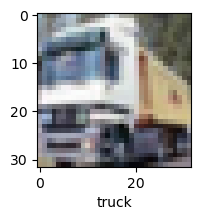

In [74]:
plot_sample(X_train, y_train, 1)

# Normalizing the training data


In [76]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build simple artificial neural network for image classification

In [78]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 58ms/step - accuracy: 0.3049 - loss: 1.9257
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.4166 - loss: 1.6462
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.4506 - loss: 1.5599
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.4750 - loss: 1.4768
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.4976 - loss: 1.4330


In [79]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.69      0.51      1000
           1       0.52      0.69      0.59      1000
           2       0.38      0.28      0.32      1000
           3       0.35      0.30      0.32      1000
           4       0.59      0.18      0.27      1000
           5       0.48      0.29      0.36      1000
           6       0.41      0.72      0.52      1000
           7       0.65      0.46      0.53      1000
           8       0.62      0.58      0.60      1000
           9       0.51      0.54      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



#  let us build a convolutional neural network to train our images

In [81]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.3772 - loss: 1.7130
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5972 - loss: 1.1530
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6517 - loss: 0.9914
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6861 - loss: 0.8977
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7088 - loss: 0.8361
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7359 - loss: 0.7661
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.7536 - loss: 0.7047
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7685 - loss: 0.6654
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7797 - loss: 0.6259
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7928 - loss: 0.5894


In [84]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6960 - loss: 0.9422


[0.9547491073608398, 0.6897000074386597]

In [85]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[1.8671935e-03, 3.2007022e-04, 7.3730145e-03, 9.4566441e-01,
        4.3691872e-04, 3.8615059e-02, 3.6337846e-03, 4.1960452e-06,
        2.0811025e-03, 4.3170303e-06],
       [4.5391449e-04, 4.2834152e-02, 1.4094623e-07, 7.5345321e-07,
        1.9474047e-08, 2.9674259e-09, 1.9408674e-08, 8.7867491e-10,
        9.5669383e-01, 1.7232996e-05],
       [1.6192233e-02, 1.5145534e-01, 3.1638963e-04, 9.8165037e-05,
        3.8808107e-04, 3.8330916e-05, 1.1015009e-05, 4.4063586e-04,
        8.2959414e-01, 1.4656114e-03],
       [9.5014125e-01, 2.3282846e-04, 2.9802982e-02, 1.5378773e-03,
        9.9235233e-03, 3.7539587e-04, 2.6122827e-05, 1.1093475e-04,
        7.8316675e-03, 1.7494755e-05],
       [4.1380241e-07, 3.1645257e-05, 3.2876924e-02, 1.1088325e-02,
        6.4761358e-01, 1.7265225e-03, 3.0663756e-01, 1.3932925e-07,
        2.4753917e-05, 1.0064618e-07]], dtype=float32)

In [86]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [87]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

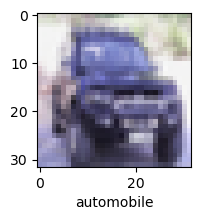

In [155]:
plot_sample(X_test, y_test,9)

In [157]:
classes[y_classes[9]]

'automobile'